In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingRegressor,RandomForestRegressor
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.pipeline import make_pipeline
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
sns.set()

In [2]:
df = pd.read_csv('../data/shot-data-all.csv')
df_top = pd.read_csv('../data/top-def.csv')
df_mid = pd.read_csv('../data/mid-def.csv')
df_bot = pd.read_csv('../data/bot-def.csv')

In [3]:
def return_model():
    return make_pipeline(
        StandardScaler(), 
        PCA(8), 
        GradientBoostingRegressor(),
    )
def train_test(df,test_size):
    X = df[['game_time','shot_made','quarter','home','shot_distance','shot_value','cum_attempts','cum_fg_percent']]
    y = df['cum_shot_made']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    return X_train, X_valid, y_train, y_valid

(array([ 71., 183., 203., 196., 153., 116.,  65.,  33.,  23.,   5.]),
 array([-0.84626184,  0.72682834,  2.29991852,  3.8730087 ,  5.44609887,
         7.01918905,  8.59227923, 10.16536941, 11.73845959, 13.31154976,
        14.88463994]),
 <a list of 10 Patch objects>)

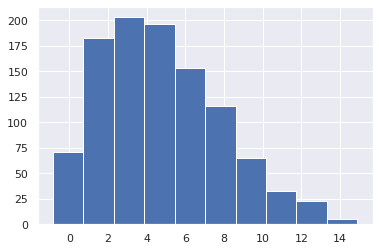

In [4]:
#TOP DEFENSE
top_def_model = return_model()
X_train, X_valid, y_train, y_valid = train_test(df_top, 0.25)
top_def_model.fit(X_train,y_train)
y_predict1 = top_def_model.predict(X_valid)
plt.hist(y_predict1)

(array([128., 203., 217., 205., 137., 116.,  76.,  31.,  12.,   4.]),
 array([-0.61334289,  1.07275418,  2.75885125,  4.44494833,  6.1310454 ,
         7.81714247,  9.50323954, 11.18933662, 12.87543369, 14.56153076,
        16.24762783]),
 <a list of 10 Patch objects>)

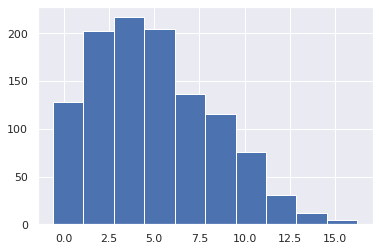

In [5]:
#MID DEFENSE
mid_def_model = return_model()
X_train, X_valid, y_train, y_valid = train_test(df_mid, 0.25)
mid_def_model.fit(X_train,y_train) 
y_predict2 = mid_def_model.predict(X_valid)
plt.hist(y_predict2)

(array([ 63., 198., 186., 189., 137., 111.,  63.,  43.,  12.,   5.]),
 array([-1.05761616,  0.59984515,  2.25730646,  3.91476777,  5.57222908,
         7.22969039,  8.88715171, 10.54461302, 12.20207433, 13.85953564,
        15.51699695]),
 <a list of 10 Patch objects>)

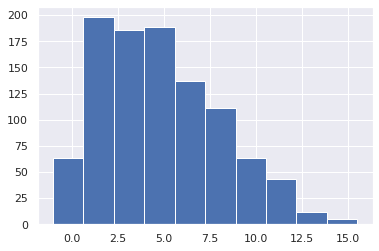

In [6]:
#BOTTOM DEFENSE 
bot_def_model = return_model()
X_train, X_valid, y_train, y_valid = train_test(df_bot, 0.25)
bot_def_model.fit(X_train,y_train)
y_predict3 = bot_def_model.predict(X_valid)
plt.hist(y_predict3)

In [7]:
#ANOVA TEST
#Step 0: level of signifance is 0.05
#Step 1: H_0: There is no statistical difference between top, middle, bottom defensive teams.
#        H_A: There is a statistical difference between top, middle, bottom defensive teams.
#Step 2: 
anova = stats.f_oneway(y_predict1,y_predict2,y_predict3)
print(anova.pvalue)
#Step 3:
#We concluded that our p-value > 0.05, which means we failed to reject the Null Hypothesis and it may seem there 
#is no statistical difference.

0.3126196809164505


In [8]:
warriors_palette = ['#006BB6', '#FDB927', '#26282A']
sns.set_palette(sns.color_palette(warriors_palette))

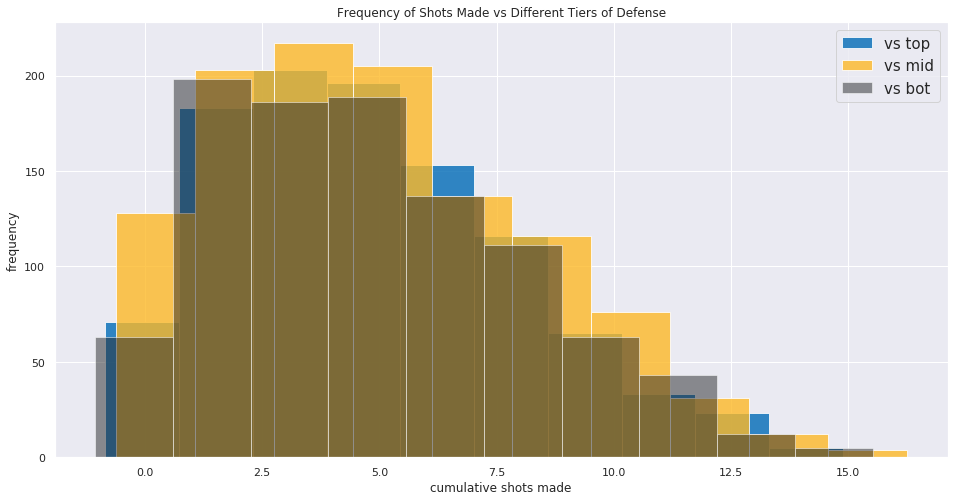

In [9]:
plt.subplots(figsize=(16,8))
plt.hist(y_predict1,alpha =0.8, label='vs top')
plt.hist(y_predict2,alpha=0.8, label='vs mid')
plt.hist(y_predict3,alpha=0.5, label='vs bot')
plt.xlabel('cumulative shots made')
plt.ylabel('frequency')
plt.title('Frequency of Shots Made vs Different Tiers of Defense')
plt.legend(prop={'size': 15})
plt.savefig('../figures/variance-shot-defs.png')